# Q.1)Prepare a prediction model for profit of 50_startups data.
Do transformations for getting better predictions of profit and
make a table containing R^2 value for each prepared model.

* R&D Spend -- Research and devolop spend in the past few years
* Administration -- spend on administration in the past few years
* Marketing Spend -- spend on Marketing in the past few years
* State -- states from which data is collected
* rofit  -- profit of each state in the past few years

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from scipy import stats as stats
import statsmodels.formula.api as smf
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

# Importing Data

In [2]:
startups_data=pd.read_csv("50_Startups.csv")
startups_data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


# EDA

In [3]:
startups_data.shape

(50, 5)

* **there are 50 rows and 5 columns in our data**

In [4]:
startups_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
startups_data.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

* **there are no null values in our data**

In [6]:
startups_data.duplicated().sum()

0

* **there are no duplicate rows in our data**

In [7]:
#checking datatypes
startups_data.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

In [8]:
startups_data["State"].unique()

array(['New York', 'California', 'Florida'], dtype=object)

* **there are 3 different States in our data.**

In [9]:
startups_data.describe(include='all')

,R&D Spend,Administration,Marketing Spend,State,Profit
count,50.000000,50.000000,50.000000,50,50.000000
unique,NaN,NaN,NaN,3,NaN
top,NaN,NaN,NaN,New York,NaN
freq,NaN,NaN,NaN,17,NaN
mean,73721.615600,121344.639600,211025.097800,NaN,112012.639200
std,45902.256482,28017.802755,122290.310726,NaN,40306.180338
min,0.000000,51283.140000,0.000000,NaN,14681.400000
25%,39936.370000,103730.875000,129300.132500,NaN,90138.902500
50%,73051.080000,122699.795000,212716.240000,NaN,107978.190000
75%,101602.800000,144842.180000,299469.085000,NaN,139765.977500


In [10]:
#correlation coefficient
corrl=startups_data.corr()
corrl

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


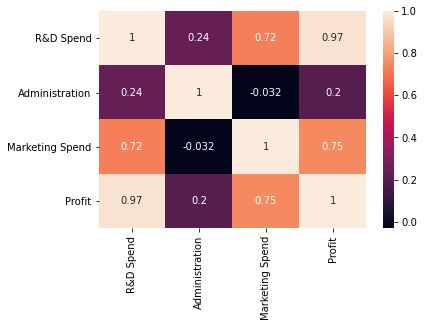

In [11]:
sns.heatmap(corrl,annot=True)
plt.show()

* **By observing the heatmap,we can say that there is no multicollinearity between input variables.
Hence,assumption of no multicollinearity satisfied.**

# Data Visualization

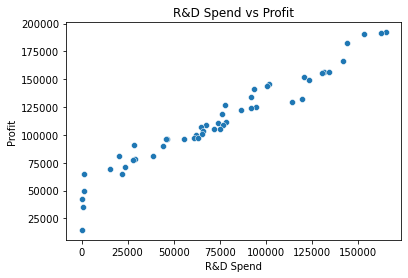

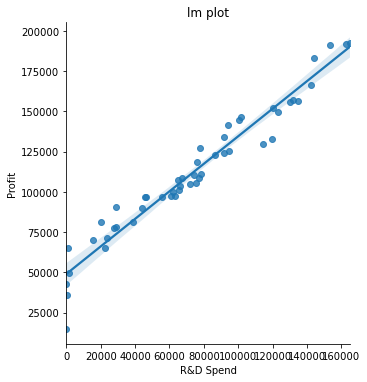

In [12]:
#Scatter plot
sns.scatterplot(x='R&D Spend',y='Profit',data=startups_data)
plt.title('R&D Spend vs Profit')

#lm plot for linearity
sns.lmplot(x='R&D Spend',y='Profit',data=startups_data)
plt.title('lm plot')
plt.show()

* **by observing above scatter plot,we can say that as R&D Spend increases Profit increases.
i.e. there is a strong positive correlation between R&D Spend and Profit**
* **by observing lm plot we can't say that our data is linear**

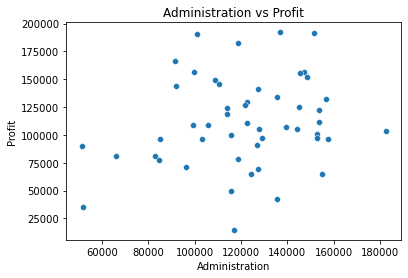

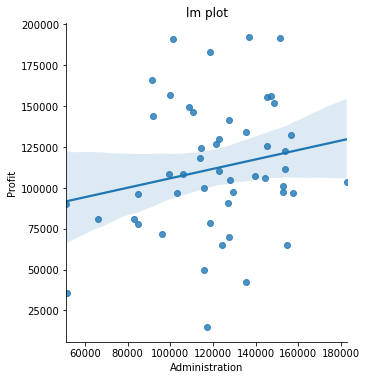

In [13]:
#scatter plot
sns.scatterplot(x='Administration',y='Profit',data=startups_data)
plt.title('Administration vs Profit')

##lm plot for linearity
sns.lmplot(x='Administration',y='Profit',data=startups_data)
plt.title('lm plot')
plt.show()

* **by observing above scatter plot,we can say that there is a positive correlation,but we can't say that there is a strong relationship between these two variable because the points are scatter.**
* **by observing lm plot we can't say that our data is linear**

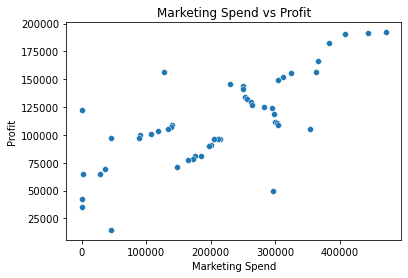

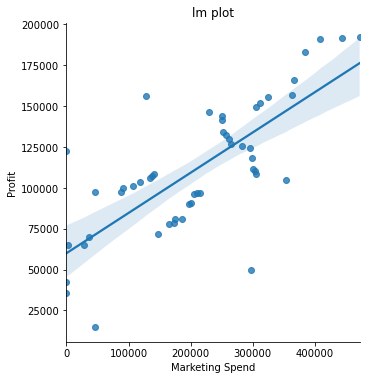

In [14]:
#scatter plot 
sns.scatterplot(x='Marketing Spend',y='Profit',data=startups_data)
plt.title('Marketing Spend vs Profit')

#lm plot for linearity
sns.lmplot(x='Marketing Spend',y='Profit',data=startups_data)
plt.title('lm plot')
plt.show()

* **Again there is a a positive correlation between Market Spend and Profit.
but it not indicates the relationship is strong enough**
* **by observing lm plot we can't say that our data is linear**

In [15]:
#distplots() and probplots() to check normality 
def plot(data,variable):
    plt.figure(figsize=(14,6))
    plt.subplot(1,2,1)
    sns.distplot(data[variable])
    plt.grid(True)
    plt.title(variable)
    plt.subplot(1,2,2)
    stats.probplot(data[variable],dist='norm',plot=plt)
    plt.grid(True)
    plt.show()

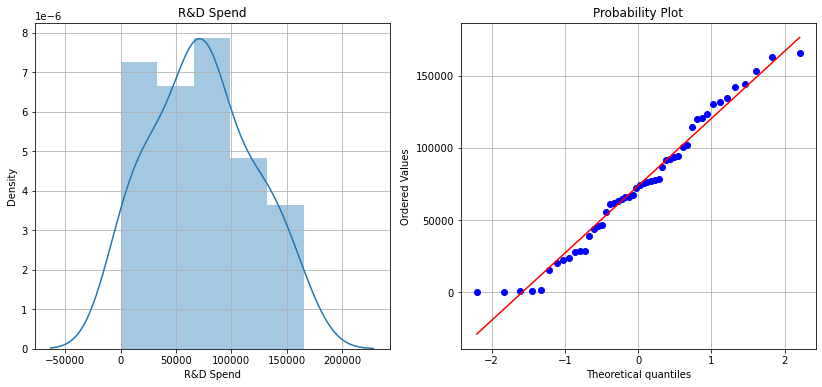

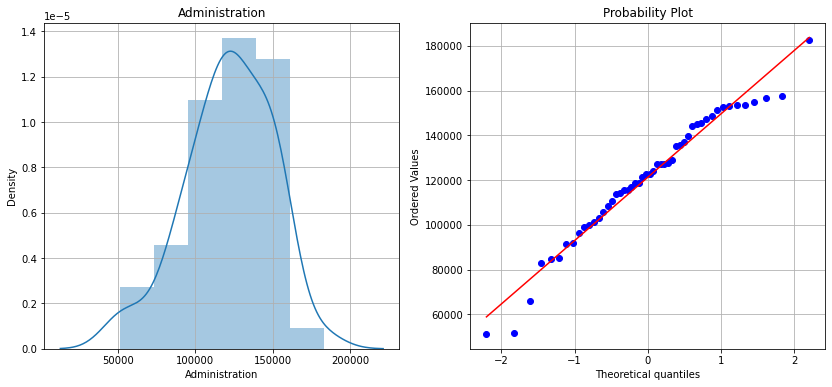

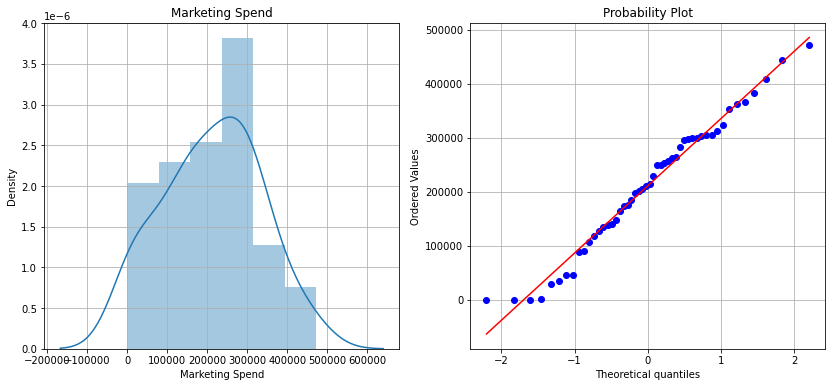

(None, None, None)

In [16]:
plot(startups_data,'R&D Spend') , plot(startups_data,'Administration') ,plot(startups_data,'Marketing Spend')

In [17]:
#skewness
startups_data.skew()

R&D Spend          0.164002
Administration    -0.489025
Marketing Spend   -0.046472
Profit             0.023291
dtype: float64

* **by observing the plots and skewness,we can say our data follows normal distribution.**

In [18]:
#kurtosis
startups_data.kurtosis()

R&D Spend         -0.761465
Administration     0.225071
Marketing Spend   -0.671701
Profit            -0.063859
dtype: float64

* **by observing kurtosis we can say that our input variables maybe not contains any outliers**

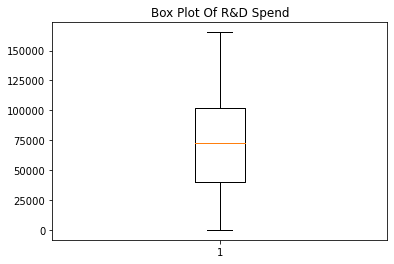

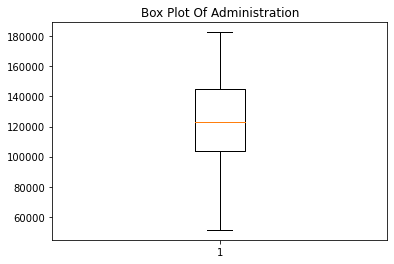

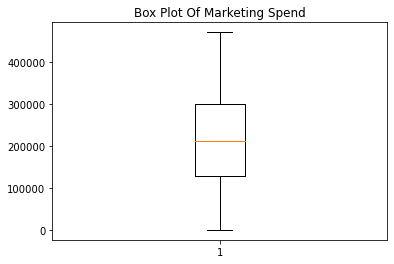

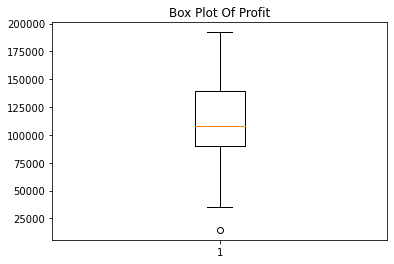

In [19]:
#Box-Plots
plt.boxplot(x='R&D Spend',data=startups_data)
plt.title('Box Plot Of R&D Spend')
plt.show()

plt.boxplot(x='Administration',data=startups_data)
plt.title('Box Plot Of Administration')
plt.show()

plt.boxplot(x='Marketing Spend',data=startups_data)
plt.title('Box Plot Of Marketing Spend')
plt.show()

plt.boxplot(x='Profit',data=startups_data)
plt.title('Box Plot Of Profit')
plt.show()

* **from above box-plots we can say that,there are no outliers in our input variables and there is one outlier in our output variable.**

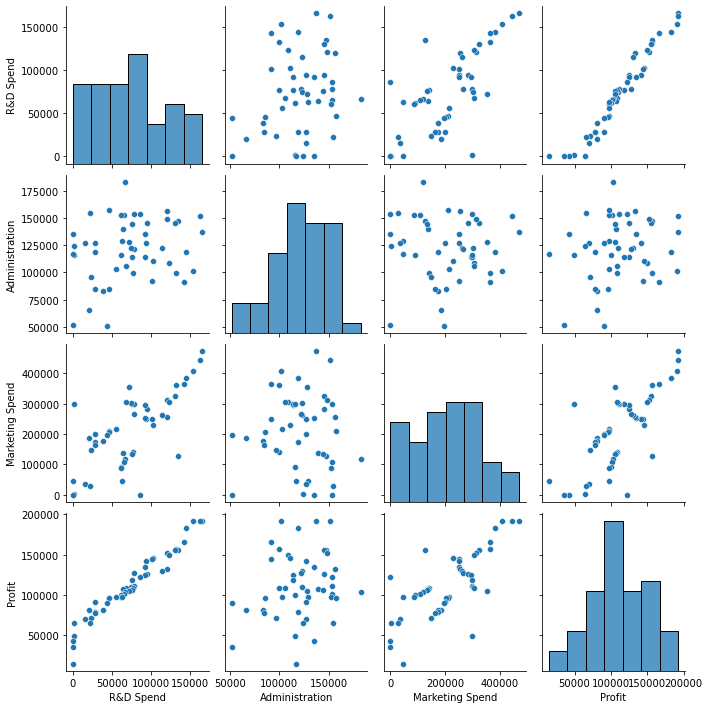

In [20]:
#pair plot()
sns.pairplot(data=startups_data)
plt.show()

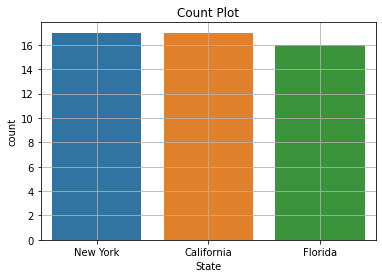

In [21]:
#Count Plot
sns.countplot(x='State',data=startups_data)
plt.title('Count Plot')
plt.grid(True)
plt.show()

* **the above count plot shows how many times each state repeated**

# Data Preparation

In [22]:
#dropping unneccesory column from our data
del startups_data["State"]

In [23]:
startups_data.columns=['R_D_Spend','Administration','Marketing_Spend','Profit']

In [24]:
startups_data.head()

,R_D_Spend,Administration,Marketing_Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


# Model Building || Model Training 

In [25]:
#model fitting by using raw data
model=smf.ols('Profit~R_D_Spend+Administration+Marketing_Spend',data=startups_data).fit()

In [26]:
#coefficients
model.params

Intercept          50122.192990
R_D_Spend              0.805715
Administration        -0.026816
Marketing_Spend        0.027228
dtype: float64

In [27]:
#t and p-values
print(model.tvalues, '\n', model.pvalues)

Intercept           7.626218
R_D_Spend          17.846374
Administration     -0.525507
Marketing_Spend     1.655077
dtype: float64 
 Intercept          1.057379e-09
R_D_Spend          2.634968e-22
Administration     6.017551e-01
Marketing_Spend    1.047168e-01
dtype: float64


In [28]:
#R squared values || Adjusted R square || AIC ||BIC
def model_name(model):
    print('R-square                           : ',round(model.rsquared,4))
    print('Adjusted R-square                  : ',round(model.rsquared_adj,4))
    print('Akaike information criterion (AIC) : ',round(model.aic,4))
    print('Bayesian information criterion(BIC): ',round(model.bic,4))

In [29]:
model_name(model)

R-square                           :  0.9507
Adjusted R-square                  :  0.9475
Akaike information criterion (AIC) :  1058.7715
Bayesian information criterion(BIC):  1066.4196


# Simple Linear Regression Models

In [30]:
#model fitting
m_RD=smf.ols('Profit~R_D_Spend',data=startups_data).fit()
#t and p-Values
print(m_RD.tvalues, '\n', m_RD.pvalues)  

Intercept    19.320288
R_D_Spend    29.151139
dtype: float64 
 Intercept    2.782697e-24
R_D_Spend    3.500322e-32
dtype: float64


In [31]:
#model fitting
m_Ad=smf.ols('Profit~Administration',data=startups_data).fit()
#t and p-Values
print(m_Ad.tvalues, '\n', m_Ad.pvalues)  

Intercept         3.040044
Administration    1.419493
dtype: float64 
 Intercept         0.003824
Administration    0.162217
dtype: float64


In [32]:
#model fitting
m_Ma=smf.ols('Profit~Marketing_Spend',data=startups_data).fit()
#t and p-Values
print(m_Ma.tvalues, '\n', m_Ma.pvalues) 

Intercept          7.808356
Marketing_Spend    7.802657
dtype: float64 
 Intercept          4.294735e-10
Marketing_Spend    4.381073e-10
dtype: float64


In [33]:
#model fitting
m_Ma_Ad=smf.ols('Profit~Administration+Marketing_Spend',data=startups_data).fit()
#t and p-Values
print(m_Ma_Ad.tvalues, '\n', m_Ma_Ad.pvalues) 

Intercept          1.142741
Administration     2.467779
Marketing_Spend    8.281039
dtype: float64 
 Intercept          2.589341e-01
Administration     1.729198e-02
Marketing_Spend    9.727245e-11
dtype: float64


# Calculating VIF

In [34]:
#VIF to check Multicollinearity
rsq_R_D_Spend=smf.ols('R_D_Spend~Administration+Marketing_Spend',data=startups_data).fit().rsquared
vif_R_D_Spend=1/(1-rsq_R_D_Spend)

rsq_Administration=smf.ols('Administration~R_D_Spend+Marketing_Spend',data=startups_data).fit().rsquared
vif_Administration=1/(1-rsq_Administration)

rsq_Marketing_Spend=smf.ols('Marketing_Spend~Administration+R_D_Spend',data=startups_data).fit().rsquared
vif_Marketing_Spendg=1/(1-rsq_Marketing_Spend)

print(' vif_R_D_Spend        :',vif_R_D_Spend,'\n','vif_Administration   :',vif_Administration , '\n' ,'vif_Marketing_Spendg :',vif_Marketing_Spendg)

 vif_R_D_Spend        : 2.4689030699947017 
 vif_Administration   : 1.1750910070550458 
 vif_Marketing_Spendg : 2.3267732905308773


 * **By observing VIF of each input variable,the values are less that 5,hence we can say that there is no Multicollinearity.**

# Residual Analysis

### Test for normality of residuals

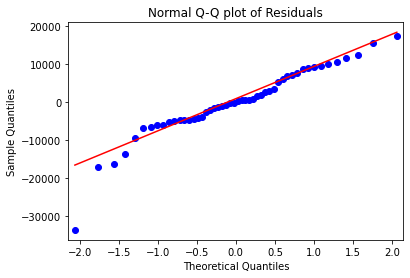

In [35]:
sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of Residuals")
plt.show()

 Maximum points are close to straight line, hence Normality Condition satisfied

### Residual Plot For Homoscedasticity

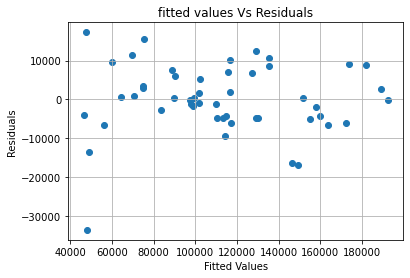

In [36]:
plt.scatter(x=model.fittedvalues,y=model.resid)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('fitted values Vs Residuals')
plt.grid(True)
plt.show()

here by above plot we can say that the datapoints are close towards zero,hence the assumption for Homoscedasticity satisfied.

# Residual Vs Regressors

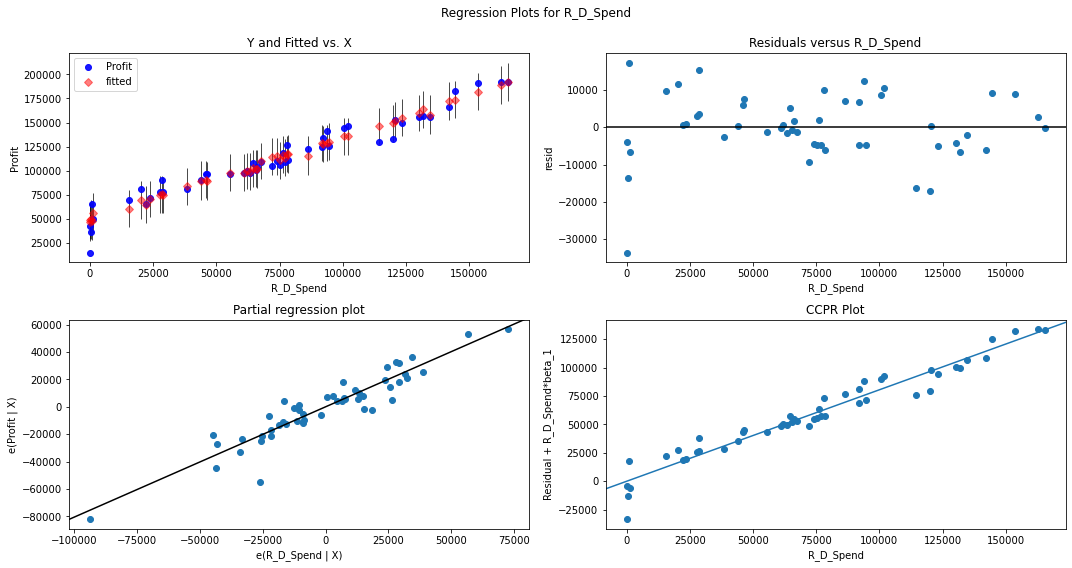

In [37]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "R_D_Spend", fig=fig)
plt.show()

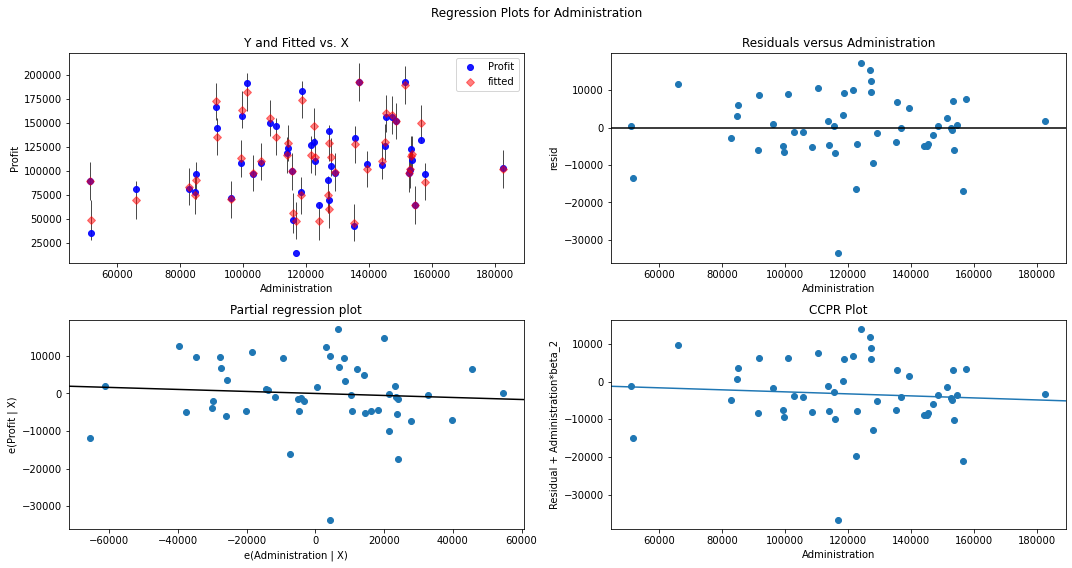

In [38]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Administration", fig=fig)
plt.show()

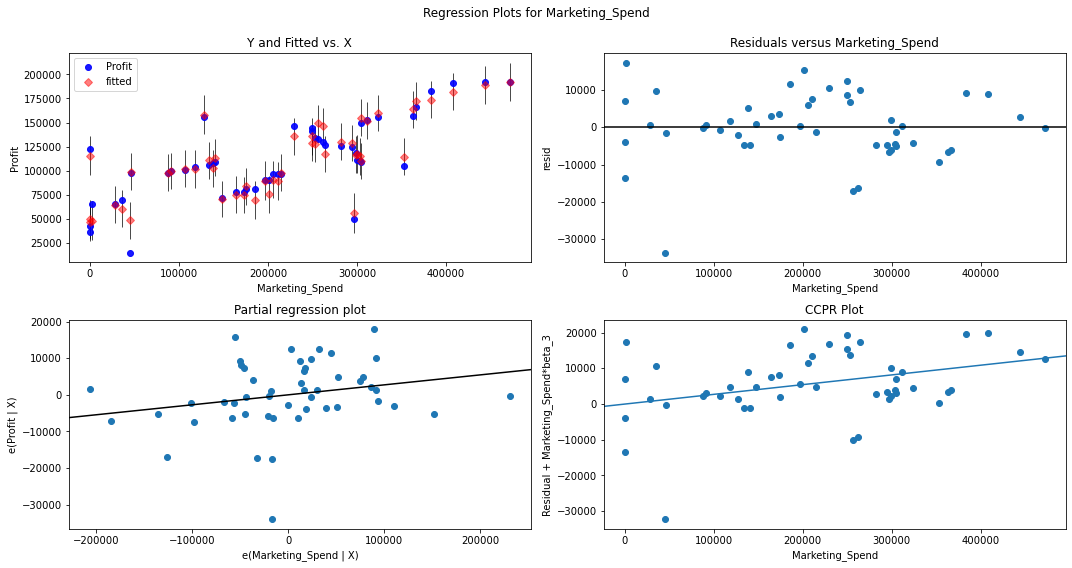

In [39]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Marketing_Spend", fig=fig)
plt.show()

## Detecting Influencers/Outliers

## Cook's distance

In [40]:
model_influence = model.get_influence()
(c,_)=model_influence.cooks_distance

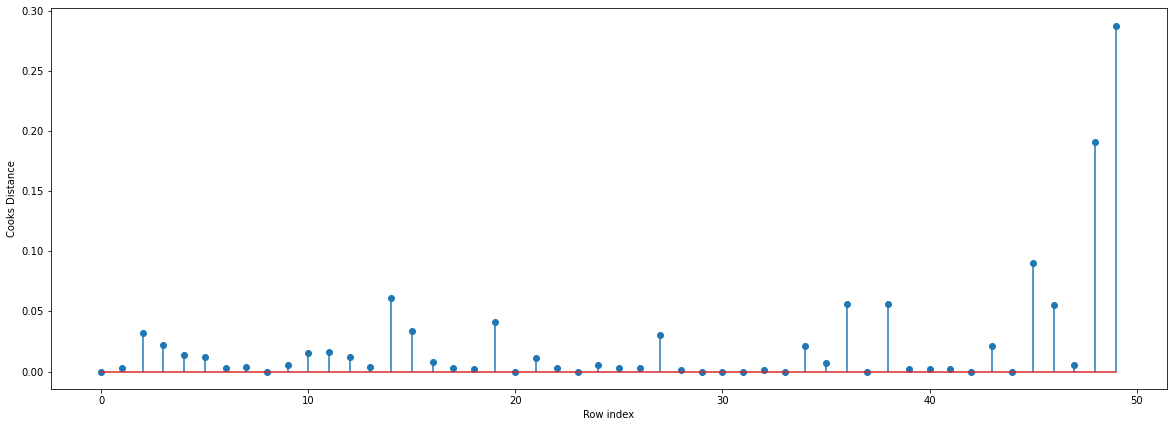

In [41]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(startups_data)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [42]:
#index and value of influencer where c is more.
(np.argmax(c),np.max(c))

(49, 0.28808229275432634)

###### Since the value is <1 ,we can say that there are no any outliers .

##  to check high Influence points by influence plot

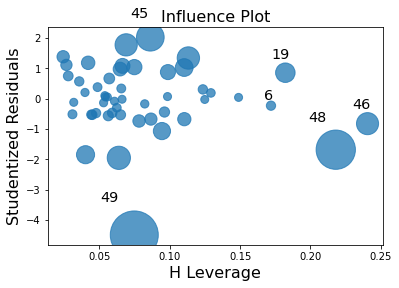

In [43]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [44]:
k = startups_data.shape[1]
n = startups_data.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.30000000000000004

* **by observing above influence plot and steam plot,we can say that there is no any value which cross the  leverage_cutoff, hence we can say that there are no influencers/outliers.** 

# 

# Using Different Transformations

## 1) SQRT Transformation

## Data Preparation

In [45]:
startups_data['sqrt_RD_Spend']=np.sqrt(startups_data['R_D_Spend'])
startups_data['sqrt_Administration']=np.sqrt(startups_data['Administration'])
startups_data['sqrt_Marketing_Spend']=np.sqrt(startups_data['Marketing_Spend'])
startups_data.head()

,R_D_Spend,Administration,Marketing_Spend,Profit,sqrt_RD_Spend,sqrt_Administration,sqrt_Marketing_Spend
0,165349.20,136897.80,471784.10,192261.83,406.631529,369.997027,686.865416
1,162597.70,151377.59,443898.53,191792.06,403.234051,389.072731,666.257105
2,153441.51,101145.55,407934.54,191050.39,391.716109,318.033882,638.697534
3,144372.41,118671.85,383199.62,182901.99,379.963696,344.487808,619.031195
4,142107.34,91391.77,366168.42,166187.94,376.971272,302.310718,605.118517


## Model building || Moel training

In [46]:
model_sqrt = smf.ols('Profit ~ sqrt_RD_Spend + sqrt_Administration + sqrt_Marketing_Spend',data=startups_data).fit()

In [47]:
print('Parameters  : \n' , model_sqrt.params)  
print('p-values    : \n',model_sqrt.pvalues)
print('t values    : \n',model_sqrt.tvalues)

Parameters  : 
 Intercept               26498.066416
sqrt_RD_Spend             349.358053
sqrt_Administration       -22.686341
sqrt_Marketing_Spend       13.711270
dtype: float64
p-values    : 
 Intercept               1.040175e-01
sqrt_RD_Spend           6.055947e-18
sqrt_Administration     6.214024e-01
sqrt_Marketing_Spend    3.640023e-01
dtype: float64
t values    : 
 Intercept                1.658518
sqrt_RD_Spend           13.781821
sqrt_Administration     -0.497220
sqrt_Marketing_Spend     0.916852
dtype: float64


In [48]:
model_name(model_sqrt)

R-square                           :  0.908
Adjusted R-square                  :  0.902
Akaike information criterion (AIC) :  1090.0347
Bayesian information criterion(BIC):  1097.6828


# 

# 2) Cube root Transformation

## Data Preparation

In [49]:
startups_data.drop(['sqrt_RD_Spend','sqrt_Administration','sqrt_Marketing_Spend'],axis=1,inplace=True)

In [50]:
startups_data['cubrt_RD_Spend']=(startups_data['R_D_Spend'])**(1/3)
startups_data['cubrt_Administration']=(startups_data['Administration'])**(1/3)
startups_data['cubrt_Marketing_Spend']=(startups_data['Marketing_Spend'])**(1/3)
startups_data.head()

,R_D_Spend,Administration,Marketing_Spend,Profit,cubrt_RD_Spend,cubrt_Administration,cubrt_Marketing_Spend
0,165349.20,136897.80,471784.10,192261.83,54.886731,51.538545,77.848055
1,162597.70,151377.59,443898.53,191792.06,54.580578,53.295089,76.283024
2,153441.51,101145.55,407934.54,191050.39,53.536210,46.592455,74.164629
3,144372.41,118671.85,383199.62,182901.99,52.459974,49.141594,72.634289
4,142107.34,91391.77,366168.42,166187.94,52.184177,45.043870,71.541871


## Model building || Moel training

In [51]:
model_cubrt = smf.ols('Profit ~ cubrt_RD_Spend + cubrt_Administration + cubrt_Marketing_Spend',data=startups_data).fit()

In [52]:
print('Parameters  : \n' , model_cubrt.params)  
print('p-values    : \n',model_cubrt.pvalues)
print('t values    : \n',model_cubrt.tvalues)

Parameters  : 
 Intercept                3551.056917
cubrt_RD_Spend           2673.585788
cubrt_Administration       20.852584
cubrt_Marketing_Spend      85.446777
dtype: float64
p-values    : 
 Intercept                9.068037e-01
cubrt_RD_Spend           1.304164e-13
cubrt_Administration     9.730916e-01
cubrt_Marketing_Spend    6.306400e-01
dtype: float64
t values    : 
 Intercept                 0.117718
cubrt_RD_Spend           10.360408
cubrt_Administration      0.033915
cubrt_Marketing_Spend     0.484060
dtype: float64


In [53]:
model_name(model_cubrt)

R-square                           :  0.8359
Adjusted R-square                  :  0.8252
Akaike information criterion (AIC) :  1118.9561
Bayesian information criterion(BIC):  1126.6042


# 3) Standard Scalar Transformation

## Data Preparation

In [54]:
startups_data.drop(['cubrt_RD_Spend','cubrt_Administration','cubrt_Marketing_Spend'],axis=1,inplace=True)

In [55]:
#transforming data in standard scalar
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
scaled_data = std_scaler.fit_transform(startups_data[['R_D_Spend','Administration','Marketing_Spend']])
scaled_data = pd.DataFrame(data=scaled_data)
scaled_data.columns=['R_D_Spend','Administration','Marketing_Spend']

In [56]:
scaled_data['Profit']=startups_data['Profit']

In [57]:
scaled_data.head()

,R_D_Spend,Administration,Marketing_Spend,Profit
0,2.016411,0.560753,2.153943,192261.83
1,1.955860,1.082807,1.923600,191792.06
2,1.754364,-0.728257,1.626528,191050.39
3,1.554784,-0.096365,1.422210,182901.99
4,1.504937,-1.079919,1.281528,166187.94


In [58]:
#before scaling mean and standard deviation
print('mean  : \n ',startups_data.mean() ,'\n','SD   :\n', startups_data.std())

mean  : 
  R_D_Spend           73721.6156
Administration     121344.6396
Marketing_Spend    211025.0978
Profit             112012.6392
dtype: float64 
 SD   :
 R_D_Spend           45902.256482
Administration      28017.802755
Marketing_Spend    122290.310726
Profit              40306.180338
dtype: float64


In [59]:
#after scaling mean and standard deviation
print('mean  : \n ',scaled_data.mean() ,'\n','SD   :\n', scaled_data.std())

mean  : 
  R_D_Spend          1.199041e-16
Administration    -2.919887e-16
Marketing_Spend   -9.325873e-17
Profit             1.120126e+05
dtype: float64 
 SD   :
 R_D_Spend              1.010153
Administration         1.010153
Marketing_Spend        1.010153
Profit             40306.180338
dtype: float64


after scaling the input variables,
* **mean of input variables becomes 0**
* **sd of input variables becomes 1**
* **means that it follows standard normal distribution, i.e. X ~ N(0,1)**

## Model building || Moel training

In [60]:
model_std_scalar = smf.ols('Profit ~ R_D_Spend+Administration+Marketing_Spend',data=scaled_data).fit()

In [61]:
print('Parameters  : \n' , model_std_scalar.params)  
print('p-values    : \n',model_std_scalar.pvalues)
print('t values    : \n',model_std_scalar.tvalues)

Parameters  : 
 Intercept          112012.639200
R_D_Spend           36612.429551
Administration       -743.773321
Marketing_Spend      3296.263048
dtype: float64
p-values    : 
 Intercept          2.053195e-52
R_D_Spend          2.634968e-22
Administration     6.017551e-01
Marketing_Spend    1.047168e-01
dtype: float64
t values    : 
 Intercept          85.790754
R_D_Spend          17.846374
Administration     -0.525507
Marketing_Spend     1.655077
dtype: float64


In [62]:
model_name(model_std_scalar)

R-square                           :  0.9507
Adjusted R-square                  :  0.9475
Akaike information criterion (AIC) :  1058.7715
Bayesian information criterion(BIC):  1066.4196


# 

### Now we compare the R-square values and AIC,BIC values for all models to get best model.

### Table of R Square values from our all fitted models

In [63]:
R_square_table=pd.DataFrame(data=
                                  {
                                  'raw_model':[model.rsquared,model.aic,model.bic],
                                  'sqrt_model':[model_sqrt.rsquared,model_sqrt.aic,model_sqrt.bic],
                                  'cubrt_model':[model_cubrt.rsquared,model_cubrt.aic,model_cubrt.bic],
                                  'std_scalar_model':[model_std_scalar.rsquared,model_std_scalar.aic,model_std_scalar.bic]
                                   }
                            ).T

In [64]:
R_square_table.columns=['R_Square_values','AIC','BIC']

In [65]:
R_square_table

,R_Square_values,AIC,BIC
raw_model,0.950746,1058.771499,1066.419591
sqrt_model,0.907957,1090.034661,1097.682753
cubrt_model,0.835866,1118.956125,1126.604217
std_scalar_model,0.950746,1058.771499,1066.419591


* **From above table we observe that the R_Square_values,AIC values and BIC values from model of Raw data and Standard_Scaler transformation are same and having best values as compare to other transformations.**
* **Hence we select any model between these two models as our best model for prediction**

# Model Selection

* **we can selet any model between our best two models.I use model from our raw data for prediction**

In [66]:
actual = startups_data["Profit"]

In [67]:
startups_data.drop('Profit',axis=1,inplace=True)

In [68]:
pred_y = model.predict(startups_data)

In [69]:
#predicted values
pred_y.head(10)

0    192521.252890
1    189156.768232
2    182147.279096
3    173696.700026
4    172139.514183
5    163580.780571
6    158114.096669
7    160021.363048
8    151741.699699
9    154884.684110
dtype: float64

In [70]:
#or we can see predicted values by following
model.fittedvalues.head(10)

0    192521.252890
1    189156.768232
2    182147.279096
3    173696.700026
4    172139.514183
5    163580.780571
6    158114.096669
7    160021.363048
8    151741.699699
9    154884.684110
dtype: float64

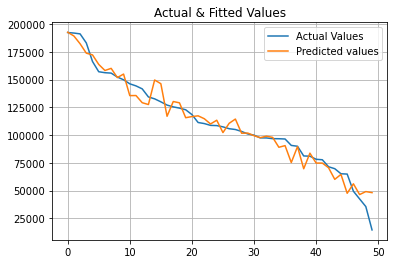

In [71]:
#plot for actual and fitted  values
plt.plot(actual,label='Actual Values')
plt.plot(pred_y,label='Predicted values')
plt.title('Actual & Fitted Values')
legend=plt.legend()
plt.grid(True)
plt.show()

# =======================================================

# ======================================================

# Q.2 ) Prepare a prediction model for predicting Price.
Consider only the below columns

**("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")**

 
* Model -- model of the car
* Price  -- Offer Price in EUROs	
* Age_08_04 -- Age in months as in August 2004	
* KM -- Accumulated Kilometers on odometer
* HP -- Horse Power
* cc -- Cylinder Volume in cubic centimeters
* Doors -- Number of doors
* Gears -- Number of gear positions
* Quarterly_Tax -- Quarterly road tax in EUROs
* Weight -- Weight in Kilograms

# Importing Data

In [72]:
corolla=pd.read_csv("ToyotaCorolla.csv")
corolla.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,�TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


# EDA

In [73]:
corolla.shape

(1436, 38)

* **there are 1436 rows and 38 columns in our data**

In [74]:
corolla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [75]:
corolla.isnull().sum()

Id                  0
Model               0
Price               0
Age_08_04           0
Mfg_Month           0
Mfg_Year            0
KM                  0
Fuel_Type           0
HP                  0
Met_Color           0
Color               0
Automatic           0
cc                  0
Doors               0
Cylinders           0
Gears               0
Quarterly_Tax       0
Weight              0
Mfr_Guarantee       0
BOVAG_Guarantee     0
Guarantee_Period    0
ABS                 0
Airbag_1            0
Airbag_2            0
Airco               0
Automatic_airco     0
Boardcomputer       0
CD_Player           0
Central_Lock        0
Powered_Windows     0
Power_Steering      0
Radio               0
Mistlamps           0
Sport_Model         0
Backseat_Divider    0
Metallic_Rim        0
Radio_cassette      0
Tow_Bar             0
dtype: int64

* **there are no null values in our data**

In [76]:
#taking only neccessory columns for our analysis
toyota_data=corolla[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]
toyota_data.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [77]:
toyota_data.shape

(1436, 9)

* **there are 1436 rows and 9 columns in our data**

In [78]:
toyota_data.isnull().sum()

Price            0
Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

In [79]:
toyota_data.duplicated().sum()

1

In [80]:
toyota_data[toyota_data.duplicated()]

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
113,24950,8,13253,116,2000,5,5,234,1320


In [81]:
#removing duplicate row
toyota_data.drop_duplicates(inplace=True)

In [82]:
toyota_data.reset_index(drop=True,inplace=True)

In [83]:
toyota_data

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


In [84]:
toyota_data.duplicated().sum()

0

In [85]:
toyota_data.shape

(1435, 9)

In [86]:
toyota_data.describe()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000
mean,10720.915679,55.980488,68571.782578,101.491986,1576.560976,4.032753,5.026481,87.020209,1072.287108
std,3608.732978,18.563312,37491.094553,14.981408,424.387533,0.952667,0.188575,40.959588,52.251882
min,4350.000000,1.000000,1.000000,69.000000,1300.000000,2.000000,3.000000,19.000000,1000.000000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.000000,3.000000,5.000000,69.000000,1040.000000
50%,9900.000000,61.000000,63451.000000,110.000000,1600.000000,4.000000,5.000000,85.000000,1070.000000
75%,11950.000000,70.000000,87041.500000,110.000000,1600.000000,5.000000,5.000000,85.000000,1085.000000
max,32500.000000,80.000000,243000.000000,192.000000,16000.000000,5.000000,6.000000,283.000000,1615.000000


In [87]:
#correlation coefficient
corrl=toyota_data.corr()
corrl

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876273,-0.569420,0.314134,0.124375,0.183604,0.063831,0.211508,0.575869
Age_08_04,-0.876273,1.000000,0.504575,-0.155293,-0.096549,-0.146929,-0.005629,-0.193319,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,0.103822,-0.035193,0.014890,0.283312,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.035207,0.091803,0.209642,-0.302287,0.087143
cc,0.124375,-0.096549,0.103822,0.035207,1.000000,0.079254,0.014732,0.305982,0.335077
Doors,0.183604,-0.146929,-0.035193,0.091803,0.079254,1.000000,-0.160101,0.107353,0.301734
Gears,0.063831,-0.005629,0.014890,0.209642,0.014732,-0.160101,1.000000,-0.005125,0.021238
Quarterly_Tax,0.211508,-0.193319,0.283312,-0.302287,0.305982,0.107353,-0.005125,1.000000,0.621988
Weight,0.575869,-0.466484,-0.023969,0.087143,0.335077,0.301734,0.021238,0.621988,1.000000


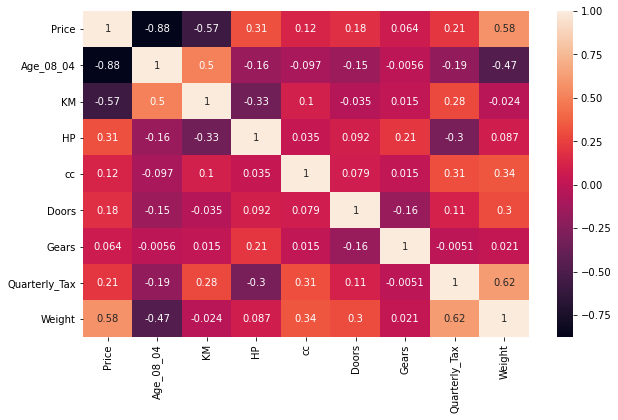

In [88]:
plt.figure(figsize=(10,6))
sns.heatmap(corrl,annot=True)
plt.show()

* **By observing the heatmap,we can say that there is no multicollinearity between input variables.
Hence,assumption of no multicollinearity satisfied.**

# Data Visualization

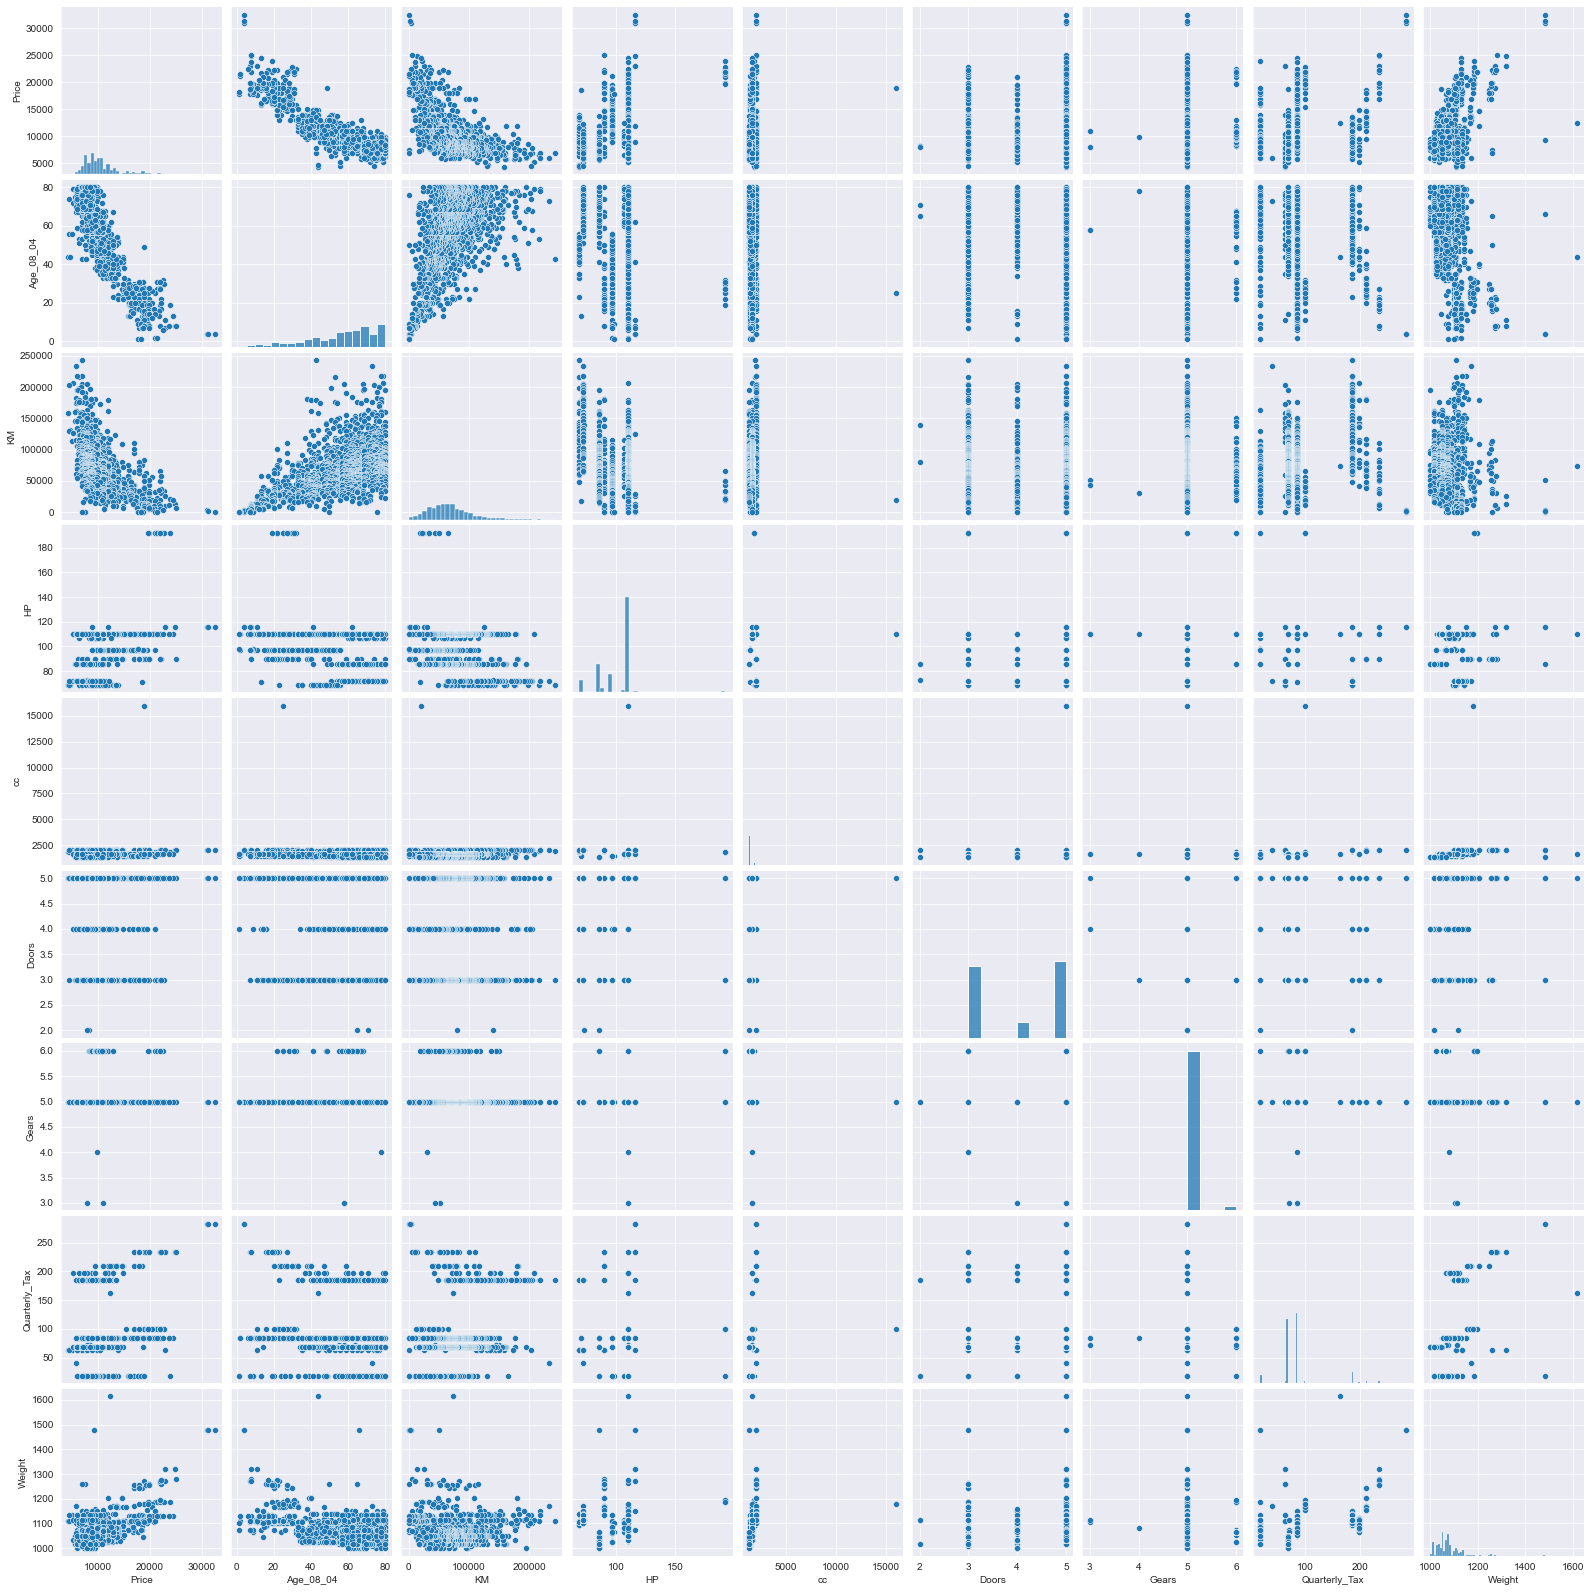

In [89]:
sns.set_style(style='darkgrid')
sns.pairplot(toyota_data)
plt.show()

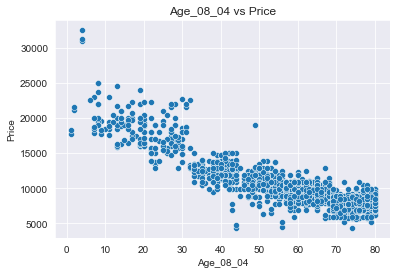

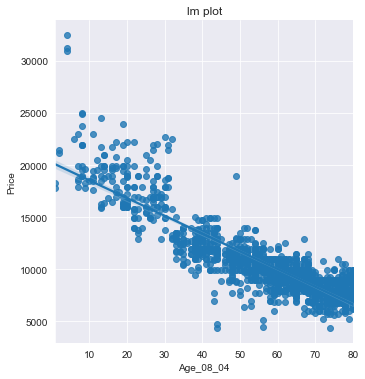

In [90]:
#Scatter plot
sns.scatterplot(x='Age_08_04',y='Price',data=toyota_data)
plt.title('Age_08_04 vs Price')

#lm plot for linearity
sns.lmplot(x='Age_08_04',y='Price',data=toyota_data)
plt.title('lm plot')
plt.show()

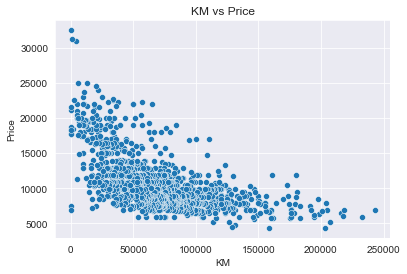

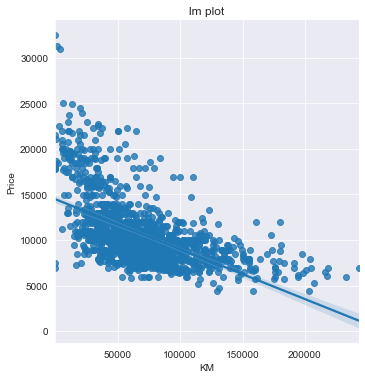

In [91]:
#scatter plot
sns.scatterplot(x='KM',y='Price',data=toyota_data)
plt.title('KM vs Price')

##lm plot for linearity
sns.lmplot(x='KM',y='Price',data=toyota_data)
plt.title('lm plot')
plt.show()

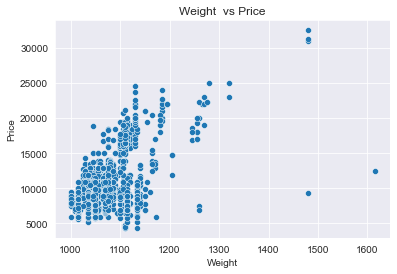

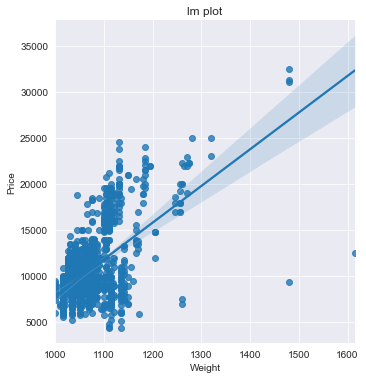

In [92]:
#scatter plot 
sns.scatterplot(x='Weight',y='Price',data=toyota_data)
plt.title('Weight  vs Price')

#lm plot for linearity
sns.lmplot(x='Weight',y='Price',data=toyota_data)
plt.title('lm plot')
plt.show()

# Data Preparation

In [93]:
toyota_data.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [94]:
X=toyota_data.drop('Price',axis=1)
y=toyota_data[['Price']]

# Model Building By sklearn library

### StandardScaler Transformation 

In [95]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
X_scaled = std_scaler.fit_transform(X)
X_scaled = pd.DataFrame(data=X_scaled,columns = X.columns)
X_scaled

,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,-1.777268,-0.575958,-0.767351,0.998113,-1.084443,-0.140475,3.003513,1.774964
1,-1.777268,0.116474,-0.767351,0.998113,-1.084443,-0.140475,3.003513,1.774964
2,-1.723380,-0.716707,-0.767351,0.998113,-1.084443,-0.140475,3.003513,1.774964
3,-1.615603,-0.548902,-0.767351,0.998113,-1.084443,-0.140475,3.003513,1.774964
4,-1.400049,-0.802384,-0.767351,0.998113,-1.084443,-0.140475,3.003513,1.870688
...,...,...,...,...,...,...,...,...
1430,0.701602,-1.281492,-1.034441,-0.651898,-1.084443,-0.140475,-0.440104,-0.905299
1431,0.863267,-1.322689,-1.034441,-0.651898,-1.084443,-0.140475,-0.440104,-1.096747
1432,0.809379,-1.375627,-1.034441,-0.651898,-1.084443,-0.140475,-0.440104,-1.096747
1433,0.755490,-1.378295,-1.034441,-0.651898,-1.084443,-0.140475,-0.440104,-1.096747


# Model Training

In [96]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(X_scaled,y)

LinearRegression()

In [97]:
#coefficients
linear_model.coef_

array([[-2.25862554e+03, -7.77200045e+02,  4.73017054e+02,
        -5.02968400e+01, -8.76327907e-01,  1.12674914e+02,
         1.57999990e+02,  8.80423097e+02]])

In [98]:
#intercept
linear_model.intercept_

array([10720.91567944])

In [99]:
#predicted values
y_pred = linear_model.predict(X_scaled)
y_pred

array([[16791.95887083],
       [16253.80041357],
       [16779.63521013],
       ...,
       [ 8455.43440191],
       [ 8579.22204117],
       [10396.0875261 ]])

In [100]:
#residuals
error = y - y_pred
error

,Price
0,-3291.958871
1,-2503.800414
2,-2829.635210
3,-1455.789389
4,-2450.217277
...,...
1430,-1294.255037
1431,2552.422658
1432,44.565598
1433,-1329.222041


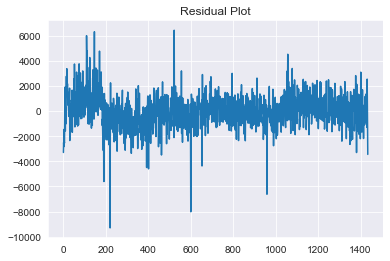

In [101]:
plt.plot(error)
plt.title('Residual Plot')
plt.show()

# Model Building || Model Training Using statmodels()

In [102]:
#model fitting by using raw data
model = smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=toyota_data).fit()

In [103]:
model.params

Intercept       -5472.540368
Age_08_04        -121.713891
KM                 -0.020737
HP                 31.584612
cc                 -0.118558
Doors              -0.920189
Gears             597.715894
Quarterly_Tax       3.858805
Weight             16.855470
dtype: float64

In [104]:
print('p-values : \n' ,model.pvalues ,'\n','t_values :\n', model.tvalues)

p-values : 
 Intercept         1.113392e-04
Age_08_04        1.879217e-288
KM                1.994713e-56
HP                5.211155e-28
cc                1.882393e-01
Doors             9.816443e-01
Gears             2.452430e-03
Quarterly_Tax     3.290363e-03
Weight            1.031118e-51
dtype: float64 
 t_values :
 Intercept        -3.875273
Age_08_04       -46.551876
KM              -16.552424
HP               11.209719
cc               -1.316436
Doors            -0.023012
Gears             3.034563
Quarterly_Tax     2.944198
Weight           15.760663
dtype: float64


In [105]:
#R squared values || Adjusted R square || AIC ||BIC
def model_name(model):
    print('R-square                           : ',round(model.rsquared,4))
    print('Adjusted R-square                  : ',round(model.rsquared_adj,4))
    print('Akaike information criterion (AIC) : ',round(model.aic,4))
    print('Bayesian information criterion(BIC): ',round(model.bic,4))

In [106]:
model_name(model)

R-square                           :  0.8625
Adjusted R-square                  :  0.8617
Akaike information criterion (AIC) :  24750.4072
Bayesian information criterion(BIC):  24797.8275


# Simple Linear Regression Models

In [107]:
toyota_data.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [108]:
#SLR and MLR model fo insignificant variables 'cc' and 'Doors'
m_cc=smf.ols('Price~cc',data=toyota_data).fit()
#t and p-Values
print(m_cc.tvalues, '\n', m_cc.pvalues)  

Intercept    24.879592
cc            4.745039
dtype: float64 
 Intercept    7.236022e-114
cc            2.292856e-06
dtype: float64


In [109]:
m_D=smf.ols('Price~Doors',data=toyota_data).fit()
#t and p-Values
print(m_D.tvalues, '\n', m_D.pvalues)  

Intercept    19.421546
Doors         7.070520
dtype: float64 
 Intercept    8.976407e-75
Doors        2.404166e-12
dtype: float64


In [111]:
m_cc_D=smf.ols('Price~cc+Doors',data=toyota_data).fit()
#t and p-Values
print(m_cc_D.tvalues, '\n', m_cc_D.pvalues) 

Intercept    12.786341
cc            4.268006
Doors         6.752236
dtype: float64 
 Intercept    1.580945e-35
cc           2.101878e-05
Doors        2.109558e-11
dtype: float64


# Calculating VIF

In [112]:
#VIF to check Multicollinearity
rsq_age=smf.ols('Age_08_04~KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=toyota_data).fit().rsquared
vif_age=1/(1-rsq_age)

rsq_km=smf.ols('KM ~ Age_08_04+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=toyota_data).fit().rsquared
vif_km=1/(1-rsq_km)

rsq_hp=smf.ols('HP ~ Age_08_04+KM+cc+Doors+Gears+Quarterly_Tax+Weight',data=toyota_data).fit().rsquared
vif_hp=1/(1-rsq_hp)

rsq_cc=smf.ols('cc ~ Age_08_04+KM+HP+Doors+Gears+Quarterly_Tax+Weight',data=toyota_data).fit().rsquared
vif_cc=1/(1-rsq_cc)

rsq_Doors=smf.ols('Doors ~ Age_08_04+KM+HP+cc+Gears+Quarterly_Tax+Weight',data=toyota_data).fit().rsquared
vif_Doors=1/(1-rsq_Doors)

rsq_Gears=smf.ols('Gears ~ Age_08_04+KM+HP+cc+Doors+Quarterly_Tax+Weight',data=toyota_data).fit().rsquared
vif_Gears=1/(1-rsq_Gears)

rsq_Quarterly_Tax=smf.ols('Quarterly_Tax ~ Age_08_04+KM+HP+cc+Doors+Gears+Weight',data=toyota_data).fit().rsquared
vif_Quarterly_Tax=1/(1-rsq_Quarterly_Tax)

rsq_Weight=smf.ols('Weight ~ Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax',data=toyota_data).fit().rsquared
vif_Weight=1/(1-rsq_Weight)

VIF=pd.DataFrame(data=
                    {'vif_age':[vif_age],'vif_km':[vif_km],'vif_hp':[vif_hp],
                        'vif_cc':[vif_cc],'vif_Doors':[vif_Doors],'vif_Gears':[vif_Gears],
                        'vif_Quarterly_Tax':[vif_Quarterly_Tax],'vif_Weight':[vif_Weight]
                    }
                  ).T
VIF

,0
vif_age,1.876236
vif_km,1.757178
vif_hp,1.419180
vif_cc,1.163470
vif_Doors,1.155890
vif_Gears,1.098843
vif_Quarterly_Tax,2.295375
vif_Weight,2.487180


 * **By observing VIF of each input variable,the values are less that 5,hence we can say that there is no Multicollinearity.**

# Residual Analysis

### Test for normality of residuals

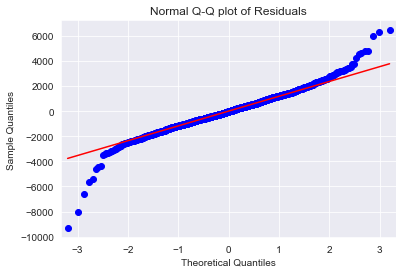

In [113]:
sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of Residuals")
plt.show()

 Maximum points are close to straight line, hence Normality Condition satisfied

### Residual Plot For Homoscedasticity

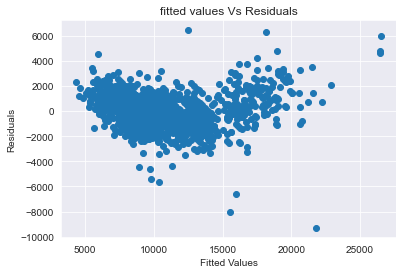

In [114]:
plt.scatter(x=model.fittedvalues,y=model.resid)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('fitted values Vs Residuals')
plt.grid(True)
plt.show()

here by above plot we can say that the datapoints are close towards zero,hence the assumption for Homoscedasticity satisfied.

# Residual Vs Regressors

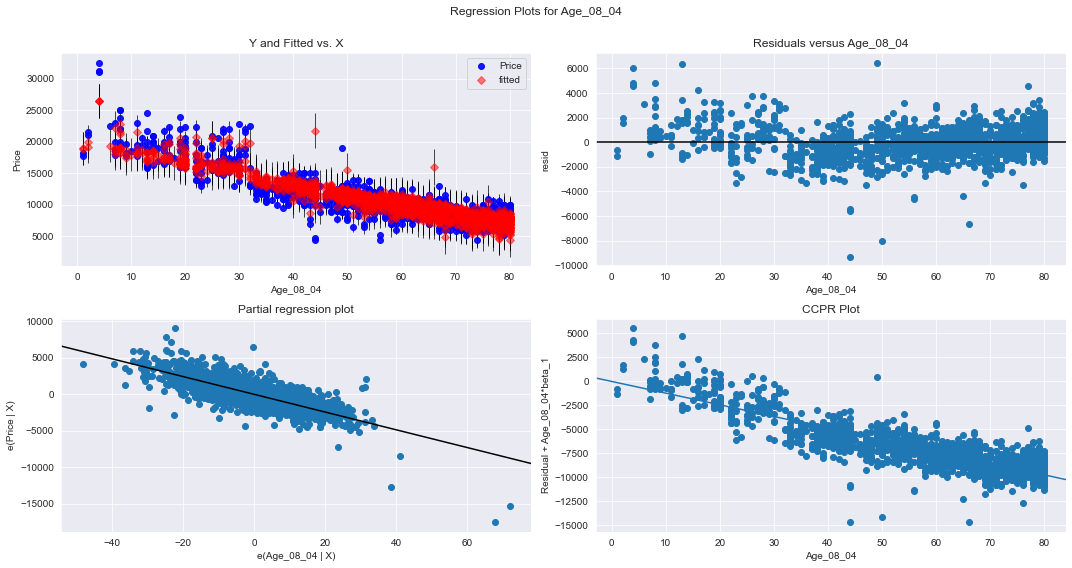

In [115]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Age_08_04", fig=fig)
plt.show()

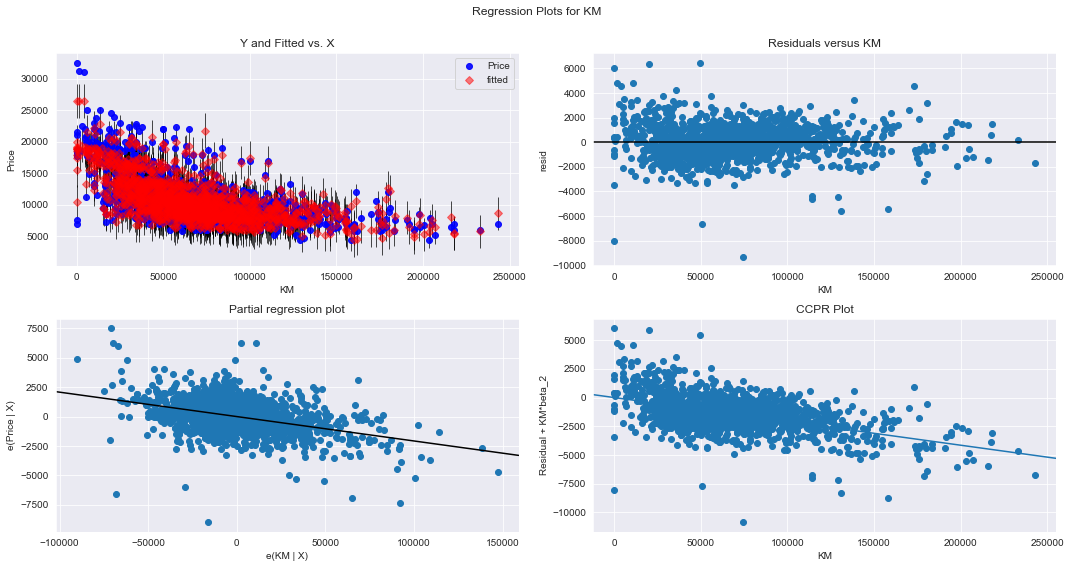

In [116]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "KM", fig=fig)
plt.show()

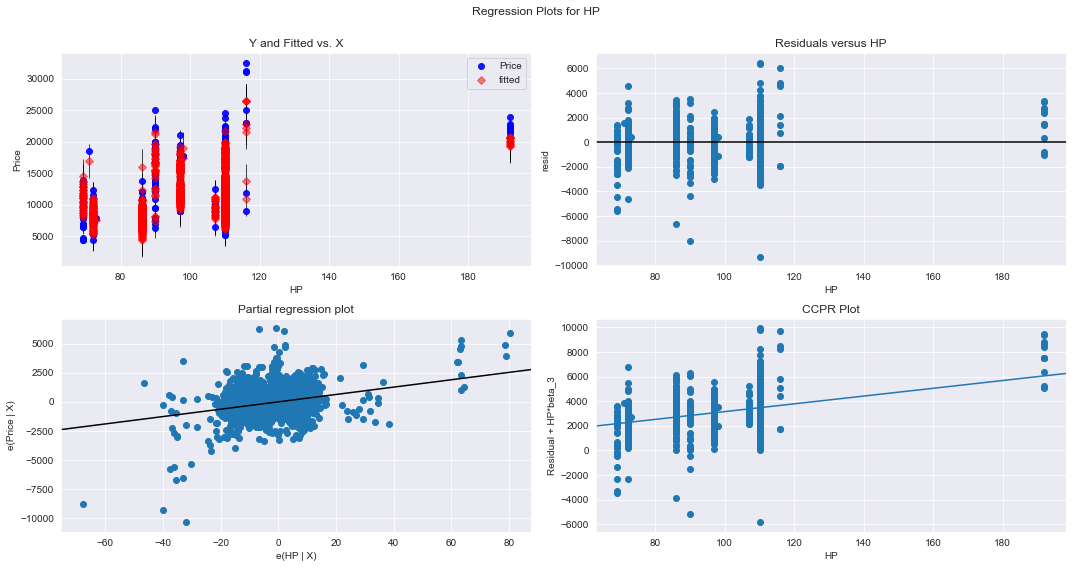

In [117]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "HP", fig=fig)
plt.show()

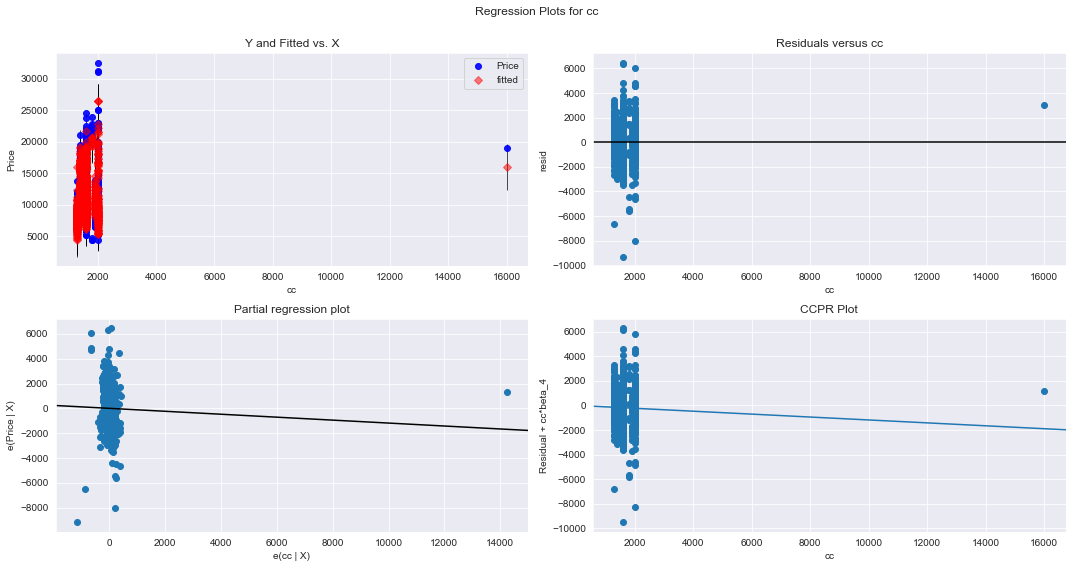

In [118]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "cc", fig=fig)
plt.show()

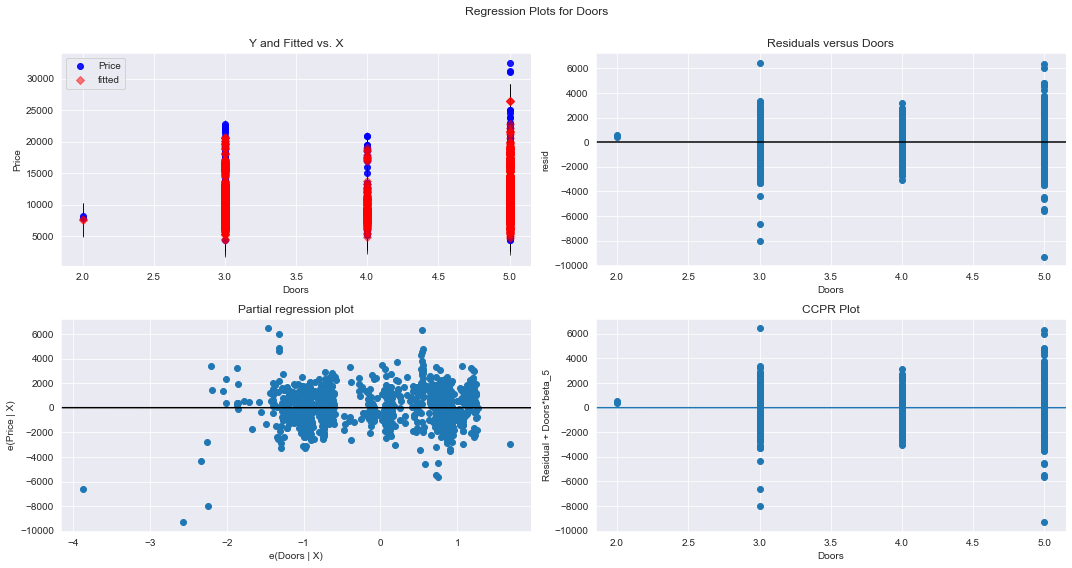

In [119]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Doors", fig=fig)
plt.show()

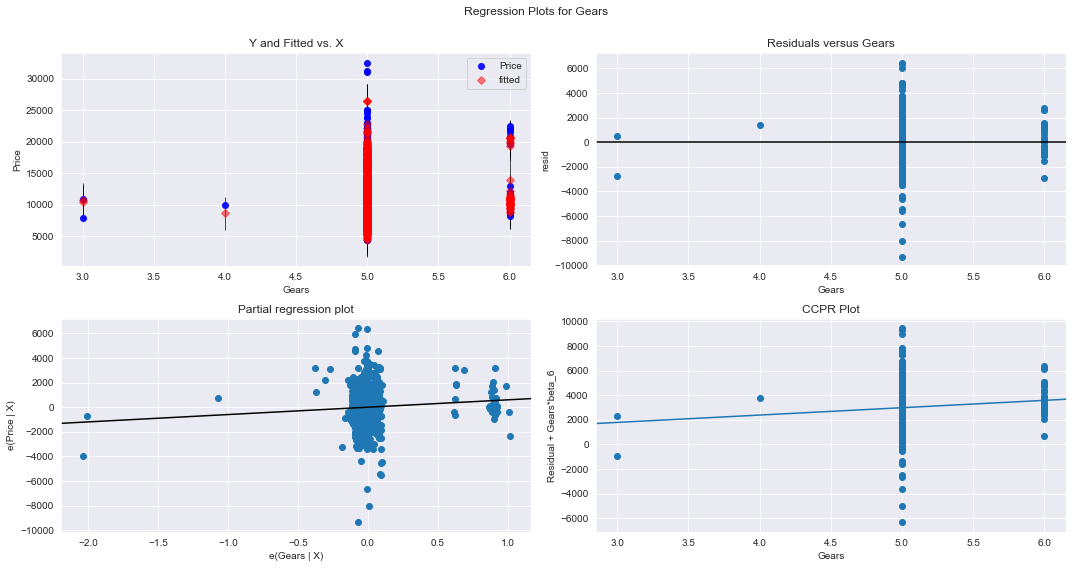

In [120]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Gears", fig=fig)
plt.show()

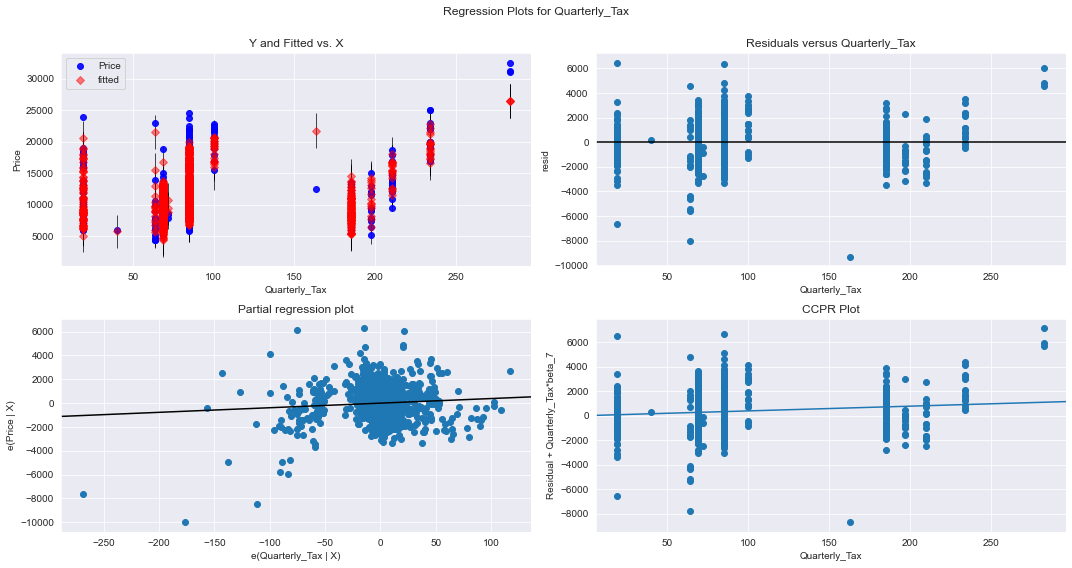

In [121]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Quarterly_Tax", fig=fig)
plt.show()

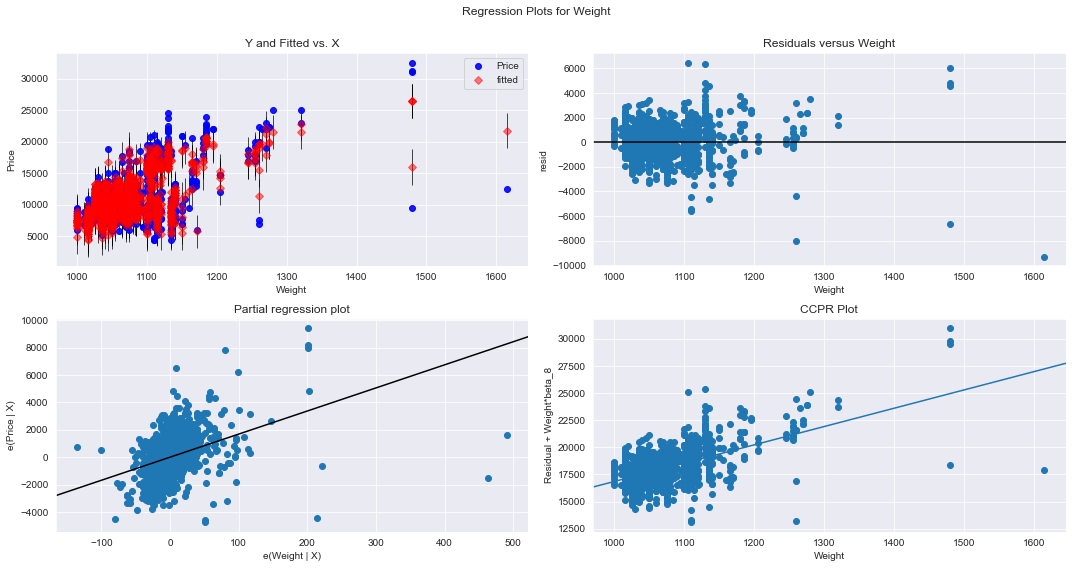

In [122]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Weight", fig=fig)
plt.show()

## Detecting Influencers/Outliers

## Cook's distance

In [123]:
model_influence = model.get_influence()
(c,_)=model_influence.cooks_distance

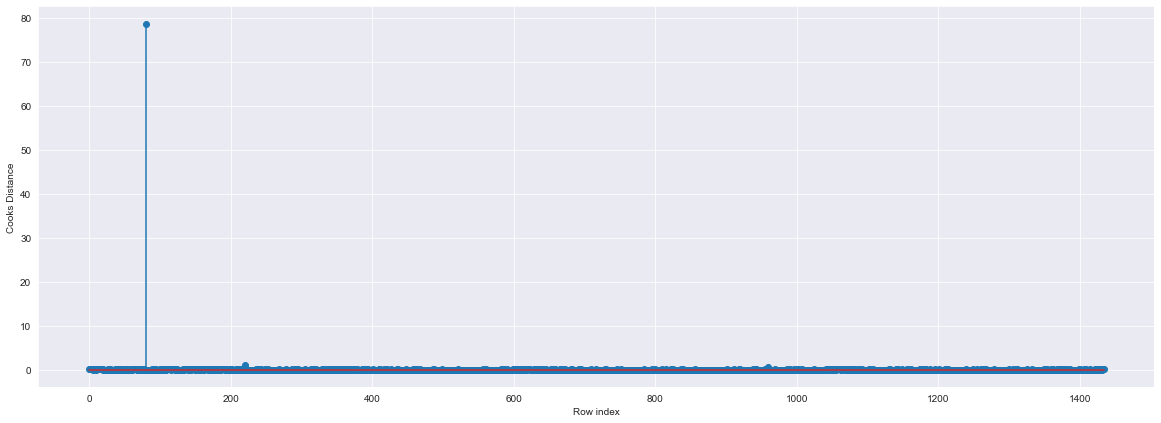

In [124]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(toyota_data)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [125]:
#index and value of influencer where c is more.
(np.argmax(c),np.max(c))

(80, 78.7295058224916)

##  **Leverage value**

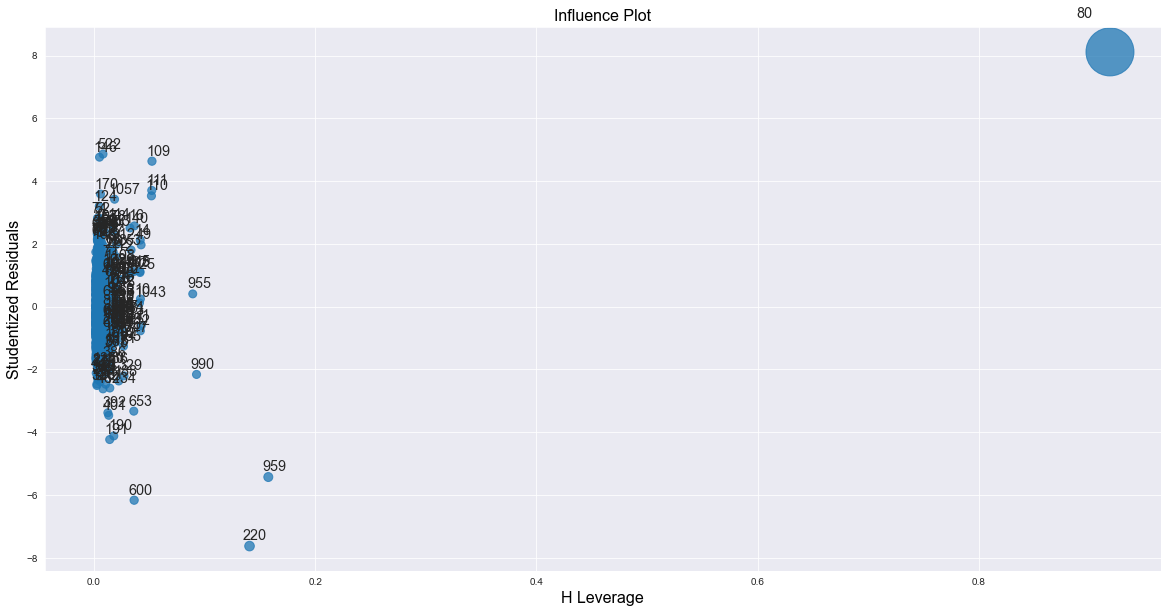

In [126]:
from statsmodels.graphics.regressionplots import influence_plot
fig,ax=plt.subplots(figsize=(20,10))
fig=influence_plot(model,ax=ax)
plt.show()

In [127]:
k = toyota_data.shape[1]
n = toyota_data.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.020905923344947737

In [128]:
#idex of influencer
toyota_data[toyota_data.index.isin([80])]

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
80,18950,25,20019,110,16000,5,5,100,1180


# Improving Model

In [129]:
data=toyota_data.copy()
data

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


In [130]:
#Discard the data points which are influencers and reasign the row number (reset_index())
new_data=data.drop(data.index[80],axis=0).reset_index(drop=True)

In [131]:
new_data

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1429,7500,69,20544,86,1300,3,5,69,1025
1430,10845,72,19000,86,1300,3,5,69,1015
1431,8500,71,17016,86,1300,3,5,69,1015
1432,7250,70,16916,86,1300,3,5,69,1015


In [132]:
#dropping all influencers which are present in our new data
while np.max(c)>0.5 :
    model=smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=new_data).fit()
    (c,_)=model.get_influence().cooks_distance
    c
    np.argmax(c) , np.max(c)
    new_data=new_data.drop(new_data.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
    new_data      
else:
    final_model=smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=new_data).fit()
    print('r-square :', final_model.rsquared ,'\n' , 'AIC     :',final_model.aic)
    print('Model Accuracy is improved to :',final_model.rsquared)

r-square : 0.8882395145171204 
 AIC     : 24382.707627340682
Model Accuracy is improved to : 0.8882395145171204


In [133]:
# rechecking for influencers,if there are no influencers now then we can fit final model.
if np.max(c)>0.5 :
    model=smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=new_data).fit()
    (c,_)=model.get_influence().cooks_distance
    c
    np.argmax(c) , np.max(c)
    new_data=new_data.drop(new_data.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
    new_data    
else:
    final_model=smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=new_data).fit()
    print('r-square :', final_model.rsquared ,'\n' , 'AIC     :',final_model.aic)
    print('Model Accuracy is improved to :',final_model.rsquared)

r-square : 0.8882395145171204 
 AIC     : 24382.707627340682
Model Accuracy is improved to : 0.8882395145171204


In [134]:
new_data

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1426,7500,69,20544,86,1300,3,5,69,1025
1427,10845,72,19000,86,1300,3,5,69,1015
1428,8500,71,17016,86,1300,3,5,69,1015
1429,7250,70,16916,86,1300,3,5,69,1015


# Model Prediction

In [135]:
actual=new_data['Price']

In [136]:
pred_values= final_model.fittedvalues
pred_values

0       16345.352610
1       15886.635544
2       16328.224968
3       15996.318854
4       15883.424182
            ...     
1426     9161.230587
1427     8536.091326
1428     8681.531063
1429     8793.668694
1430    10860.695492
Length: 1431, dtype: float64

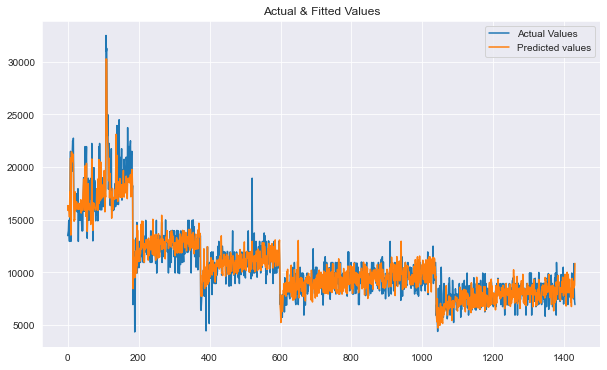

In [137]:
#plot for actual and fitted  values
plt.figure(figsize=(10,6))
plt.plot(actual,label='Actual Values')
plt.plot(pred_values,label='Predicted values')
plt.title('Actual & Fitted Values')
legend=plt.legend()
plt.grid(True)
plt.show()